Para empezar, importamos las librerías

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

Leemos el csv.

In [5]:
DF= pd.read_csv("C:/Users/USER/Desktop/documentos labs/ML/properties_colombia_train.csv",  encoding="UTF-8",  engine='python', index_col=[0])
DF

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,Medellín,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,Bucaramanga,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,Medellín,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,Bogotá D.C,...,NaN,NaN,1.290000e+08,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682)
976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,...,NaN,17.0,1.350000e+08,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668)
508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,...,NaN,NaN,5.200000e+08,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413)


Vemos la correlación. 

In [6]:
DF.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_20412\2191442155.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DF.corr()


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,0.348782,-0.090049,-0.087967,-0.078776,-0.014730,-0.002049,-0.004829
lon,0.348782,1.000000,-0.091085,-0.058143,-0.031767,0.009189,-0.005953,0.032939
rooms,-0.090049,-0.091085,1.000000,0.999131,0.664379,0.086619,0.051583,0.178329
bedrooms,-0.087967,-0.058143,0.999131,1.000000,0.579127,0.071450,0.046264,0.121947
bathrooms,-0.078776,-0.031767,0.664379,0.579127,1.000000,0.104708,0.052931,0.443496
surface_total,-0.014730,0.009189,0.086619,0.071450,0.104708,1.000000,0.711513,0.414640
surface_covered,-0.002049,-0.005953,0.051583,0.046264,0.052931,0.711513,1.000000,0.206906
price,-0.004829,0.032939,0.178329,0.121947,0.443496,0.414640,0.206906,1.000000


Revisamos la cantidad de datos faltantes. 

In [7]:
DF.isnull().sum()

id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 49498
lon                 49498
l1                      0
l2                      0
l3                  11032
l4                 152182
l5                 170140
l6                 190682
rooms              170012
bedrooms           157024
bathrooms           41082
surface_total      190575
surface_covered    187747
price                  63
currency               67
price_period       161578
title                   1
description           121
property_type           0
operation_type          0
geometry                0
dtype: int64

Dropeamos las columnas con un alto porcentaje de valores faltantes.

In [8]:
DF2=DF.drop ( ["l4","l5","l6","rooms", "bedrooms","surface_total", "surface_covered","price_period", "created_on"], axis=1 )
DF2

,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,,
861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,9.000000e+09,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,6.250000e+08,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,4.200000e+08,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,NaN,NaN,Colombia,Santander,Bucaramanga,1.0,1.310000e+09,COP,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,NaN,NaN,Colombia,Antioquia,Medellín,2.0,2.100000e+08,COP,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,4.649682,-74.161950,Colombia,Cundinamarca,Bogotá D.C,NaN,1.290000e+08,COP,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682)
976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,1.0,1.350000e+08,COP,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668)
508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,1.0,5.200000e+08,COP,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413)


Dropeamos los duplicados.
La indicación dada fue esta: Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) 
se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.

In [9]:
DF3=DF2.drop_duplicates(['id'], keep='last')
DF3

,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,,
861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,9.000000e+09,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,6.250000e+08,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,4.200000e+08,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,NaN,NaN,Colombia,Santander,Bucaramanga,1.0,1.310000e+09,COP,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,NaN,NaN,Colombia,Antioquia,Medellín,2.0,2.100000e+08,COP,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,4.649682,-74.161950,Colombia,Cundinamarca,Bogotá D.C,NaN,1.290000e+08,COP,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682)
976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,1.0,1.350000e+08,COP,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668)
508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,1.0,5.200000e+08,COP,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413)


In [10]:
DF3.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_20412\3593616241.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DF3.corr()


,lat,lon,bathrooms,price
lat,1.000000,0.348782,-0.078776,-0.004829
lon,0.348782,1.000000,-0.031767,0.032939
bathrooms,-0.078776,-0.031767,1.000000,0.443496
price,-0.004829,0.032939,0.443496,1.000000


Ahora si dropeamos los datos faltantes restantes.

In [12]:
DF4= DF3.dropna()
DF4

,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,,
861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,9.000000e+09,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,6.250000e+08,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,4.200000e+08,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
991390,25/kKYGu15xlIwnX/5zxbg==,Propiedad,2020-12-17,2021-03-04,5.049009,-75.506802,Colombia,Caldas,Manizales,2.0,1.679523e+08,COP,"Venta apartamento en Via Panamericana, Manizal...",Nos complace ofrecer este excelente proyecto u...,Apartamento,Venta,POINT (-75.50680161 5.04900894)
51545,Tk4d+1APd8R7riHpi/dLtg==,Propiedad,2020-09-13,2020-09-24,4.732379,-74.082150,Colombia,Cundinamarca,Bogotá D.C,8.0,2.700000e+09,COP,Espectacular Casa en cerros de provenza.,"Casa de tres pisos,en el ultimo piso,terraza b...",Casa,Venta,POINT (-74.0821496 4.732379)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418228,v1chkpiecVrlNw1xnDURDQ==,Propiedad,2020-08-11,2020-08-11,4.636047,-74.147480,Colombia,Cundinamarca,Bogotá D.C,2.0,1.950000e+08,COP,APARTAMENTO EN VENTA EN URBANIZACION CASTILLA ...,638-2036 Venta Espectacular Apartamento ubicad...,Apartamento,Venta,POINT (-74.1474797 4.6360473)
976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,1.0,1.350000e+08,COP,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668)
508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,1.0,5.200000e+08,COP,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413)


In [14]:
DF4.head(12)

,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,,
861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,9.000000e+09,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,6.250000e+08,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,4.200000e+08,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
991390,25/kKYGu15xlIwnX/5zxbg==,Propiedad,2020-12-17,2021-03-04,5.049009,-75.506802,Colombia,Caldas,Manizales,2.0,1.679523e+08,COP,"Venta apartamento en Via Panamericana, Manizal...",Nos complace ofrecer este excelente proyecto u...,Apartamento,Venta,POINT (-75.50680161 5.04900894)
51545,Tk4d+1APd8R7riHpi/dLtg==,Propiedad,2020-09-13,2020-09-24,4.732379,-74.082150,Colombia,Cundinamarca,Bogotá D.C,8.0,2.700000e+09,COP,Espectacular Casa en cerros de provenza.,"Casa de tres pisos,en el ultimo piso,terraza b...",Casa,Venta,POINT (-74.0821496 4.732379)
976383,NZQXFp4JdYAfUErzAN/Mjw==,Propiedad,2020-11-27,2021-02-26,10.990806,-74.821082,Colombia,Atlántico,Barranquilla,2.0,1.840000e+08,COP,APARTAMENTOS EN OBRA A LA VENTA CON ENTREGA PA...,MATEUS INMOBILIARIA Y CONSTRUCTORA ZAGOZ TE PR...,Apartamento,Venta,POINT (-74.8210818 10.9908065)
429748,BXINrHETdqXr8in2HyL0xQ==,Propiedad,2020-09-25,2020-09-25,10.977000,-74.809000,Colombia,Atlántico,Barranquilla,2.0,2.500000e+08,COP,Apartamento En Arriendo/venta En Barranquilla ...,"CASA EN BUEN ESTADO, AMPLIA, FRESCA. BUENA UBI...",Apartamento,Venta,POINT (-74.809 10.977)
445163,e1ovQ3l3JVOwQZNTvayF2Q==,Propiedad,2020-10-27,2020-12-11,3.447725,-76.490886,Colombia,Valle del Cauca,Cali,2.0,2.800000e+08,COP,VENTA CASA NUEVA BASE,"CASA BIFAMILIAR, esquinera en pasaje, cerca a ...",Casa,Venta,POINT (-76.4908855 3.4477248)
592935,QYwpiFZmInrc4aCltoV4Kg==,Propiedad,2020-12-18,2021-01-07,5.093294,-75.531532,Colombia,Caldas,Manizales,2.0,2.000000e+08,COP,Venta Apartamento Conjunto Villapilar Vía Ver...,Te ofrecemos confortable apartamento en el sec...,Apartamento,Venta,POINT (-75.5315319 5.0932942)


In [15]:
DF4.tail(30)

,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,,
780081,3x1g/qBJenvlJMpAh7FezQ==,Propiedad,2020-12-03,2020-12-11,3.365587,-76.536040,Colombia,Valle del Cauca,Cali,3.0,1.050000e+09,COP,CASA EXTERNA CIUDAD JARDIN CON PISCINA (K) _ w...,COD WASI (2573191) K.G HERMOSA CASA EXTERNA EN...,Casa,Venta,POINT (-76.53604031 3.36558701)
291908,3/JdTQC5QVOFHxFNVUZRog==,Propiedad,2020-09-23,2020-09-24,10.945000,-74.790000,Colombia,Atlántico,Barranquilla,1.0,1.300000e+08,COP,Apartamento En Venta En Barranquilla Las Palma...,"Te presentamos para venta un acogedor apto, ub...",Apartamento,Venta,POINT (-74.79 10.945)
408613,0V21664MWIKK/kunIlzVLQ==,Propiedad,2020-11-20,2021-02-18,4.727010,-74.043560,Colombia,Cundinamarca,Bogotá D.C,3.0,4.989000e+08,COP,Venta apartamento en Cedritos piso alto,"Venta apartamento en Cedritos piso alto, const...",Apartamento,Venta,POINT (-74.0435599 4.7270097)
972753,IIhwwd3D+wCbNr5OCMaX7A==,Propiedad,2020-08-25,9999-12-31,4.667436,-74.050751,Colombia,Cundinamarca,Bogotá D.C,3.0,1.350000e+09,COP,"APARTAMENTO EN VENTA, BOGOTA-LA CABRERA EL REF...","Magnifico, Exterior, tres alcobas, tres baños,...",Apartamento,Venta,POINT (-74.0507513 4.6674356)
188263,mbfn22xmTtgHpItFsQ/l4w==,Propiedad,2020-08-20,2020-09-09,4.660000,-74.049000,Colombia,Cundinamarca,Bogotá D.C,4.0,4.016143e+09,COP,Apartamento En Arriendo/venta En Bogota Rosale...,Espectacular apartamento para estrenar. Al ing...,Casa,Venta,POINT (-74.049 4.66)
579195,bdrWhYgsuYdblIzsyT30hw==,Propiedad,2020-10-01,2020-10-02,3.436000,-76.491000,Colombia,Valle del Cauca,Cali,2.0,1.350000e+08,COP,Casa En Venta En Cali Villa Del Lago CodVBABC5482,Se vende Casa de dos plantas en villa del lago...,Casa,Venta,POINT (-76.491 3.436)
239230,twe7NHUYX3fSIxCB2+hqHQ==,Propiedad,2020-11-24,2020-12-10,11.233000,-74.204000,Colombia,Magdalena,Santa Marta,2.0,2.900000e+08,COP,VENTA APARTAMENTO BAVARIA SANTA MARTA,<b>VENTA APARTAMENTO BAVARIA SANTA MARTA</b><b...,Apartamento,Venta,POINT (-74.204 11.233)
809208,IE5Soxf2KGvl3peNc2Qckg==,Propiedad,2020-11-30,2020-12-01,4.806172,-75.680802,Colombia,Risaralda,Pereira,2.0,3.000000e+08,COP,VENDO O ARRIENDO APARTAMENTO SECTOR CIRCUNVALA...,Espectacular Apartamento en uno de los sectore...,Apartamento,Venta,POINT (-75.68080187 4.80617227)
538106,oy3aqNtubxd8Jjav9Ie93g==,Propiedad,2020-11-23,2020-11-23,7.901000,-72.500000,Colombia,Norte de Santander,Cúcuta,3.0,3.200000e+08,COP,Casa En Venta En Cúcuta Cambulos CodVBPRV101094,Casa de dos niveles amoblada en venta consta d...,Casa,Venta,POINT (-72.5 7.901)


Observamos la media del precio.

In [16]:
DF4.describe()

,lat,lon,bathrooms,price
count,108738.000000,108738.000000,108738.000000,1.087380e+05
mean,5.731333,-75.007584,2.713955,5.439242e+08
std,2.246207,1.108145,1.475573,9.317767e+08
min,-32.787342,-119.698190,1.000000,9.000000e+05
25%,4.589237,-75.611170,2.000000,1.980000e+08
50%,5.013000,-75.472680,2.000000,3.200000e+08
75%,6.268340,-74.092112,3.000000,5.800000e+08
max,34.420334,-67.482570,20.000000,1.207830e+11


In [18]:
#Media con outliers
conoutlier=np.mean(DF4["price"])
conoutlier

543924168.5477479

Se halla los outliers con la regla de las 3 sigmas.

In [19]:

me=np.mean(DF4["price"])- 3 * np.std(DF4["price"])
me

-2251393084.1451836

In [20]:
ma=np.mean(DF4["price"])+ 3 * np.std(DF4["price"])
ma

3339241421.240679

Aqui obtengo la media sin los outliers 

In [21]:

sinoutlier=[]
for i in range (len(DF4["price"]+1)) :
    if DF4["price"].values[i] < ma :
        sinoutlier.append(DF4["price"].values[i])



PrecioPromedio=np.mean(sinoutlier)

Creo la columna de salida con la asignación Barato y Caro como valores.

In [22]:

DF4['Caro/Barato'] = pd.cut(x = DF4['price'],
bins=[DF4['price'].min()-1,
PrecioPromedio,
DF4['price'].max()+1], 
labels=['Barato', 'Caro'])

C:\Users\USER\AppData\Local\Temp\ipykernel_20412\966345979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF4['Caro/Barato'] = pd.cut(x = DF4['price'],


In [23]:
DF4

,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type,geometry,Caro/Barato
Unnamed: 0,,,,,,,,,,,,,,,,,,
861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,9.000000e+09,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),Caro
200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,6.250000e+08,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),Caro
554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,4.200000e+08,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),Barato
991390,25/kKYGu15xlIwnX/5zxbg==,Propiedad,2020-12-17,2021-03-04,5.049009,-75.506802,Colombia,Caldas,Manizales,2.0,1.679523e+08,COP,"Venta apartamento en Via Panamericana, Manizal...",Nos complace ofrecer este excelente proyecto u...,Apartamento,Venta,POINT (-75.50680161 5.04900894),Barato
51545,Tk4d+1APd8R7riHpi/dLtg==,Propiedad,2020-09-13,2020-09-24,4.732379,-74.082150,Colombia,Cundinamarca,Bogotá D.C,8.0,2.700000e+09,COP,Espectacular Casa en cerros de provenza.,"Casa de tres pisos,en el ultimo piso,terraza b...",Casa,Venta,POINT (-74.0821496 4.732379),Caro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418228,v1chkpiecVrlNw1xnDURDQ==,Propiedad,2020-08-11,2020-08-11,4.636047,-74.147480,Colombia,Cundinamarca,Bogotá D.C,2.0,1.950000e+08,COP,APARTAMENTO EN VENTA EN URBANIZACION CASTILLA ...,638-2036 Venta Espectacular Apartamento ubicad...,Apartamento,Venta,POINT (-74.1474797 4.6360473),Barato
976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,1.0,1.350000e+08,COP,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668),Barato
508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,1.0,5.200000e+08,COP,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413),Caro


In [24]:
DF4.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_20412\1469964629.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DF4.corr()


,lat,lon,bathrooms,price
lat,1.000000,0.341201,-0.081606,-0.030286
lon,0.341201,1.000000,-0.032835,0.030783
bathrooms,-0.081606,-0.032835,1.000000,0.434142
price,-0.030286,0.030783,0.434142,1.000000


Observamos graficamente la correlación.

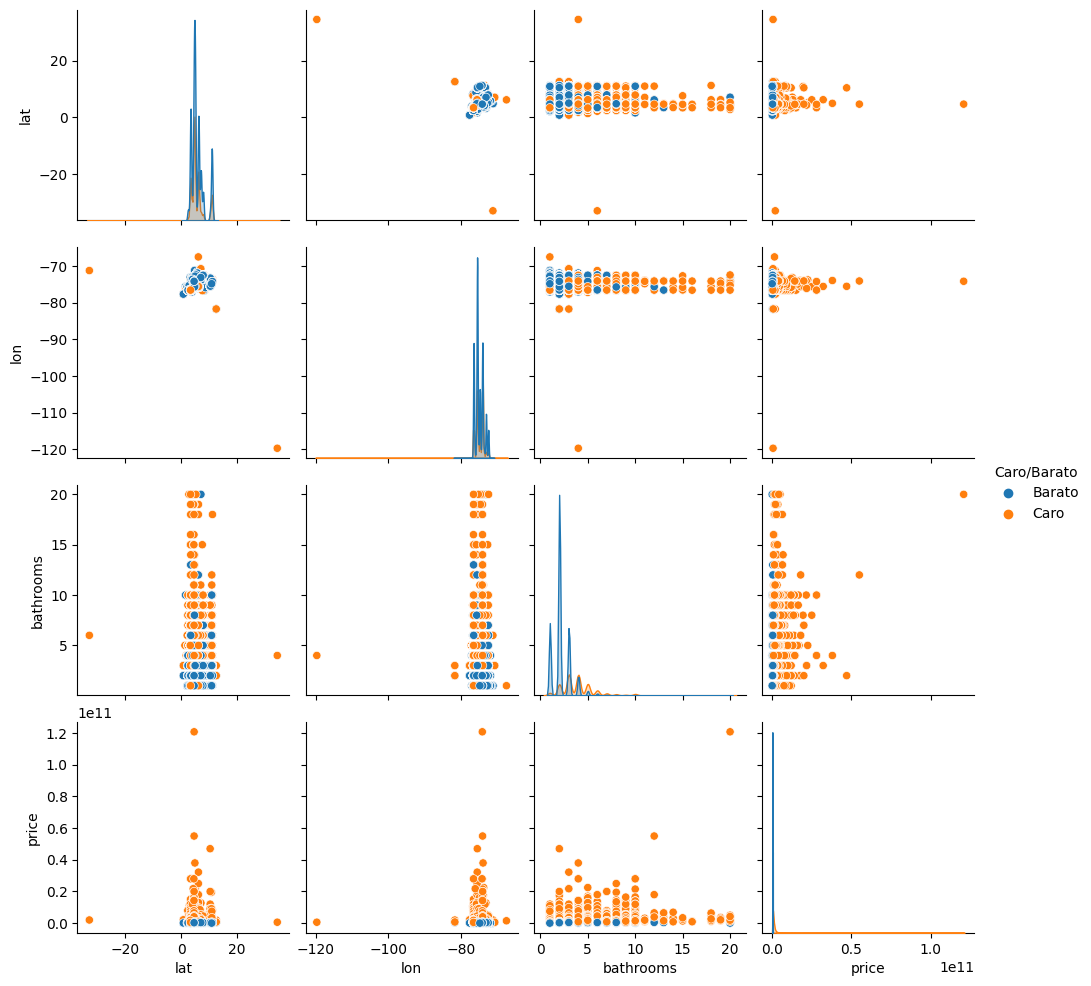

In [26]:
sns.pairplot(DF4, hue="Caro/Barato")

Leemos el segundo csv. El de test. Le realizamos el mismo proceso de dropear las mismas columnas que al primer csv.

In [27]:
DFTest= pd.read_csv("C:/Users/USER/Desktop/documentos labs/ML/properties_colombia_test.csv",  encoding="UTF-8",  engine='python', index_col=[0] )
DFTest

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,2020-09-04,4.722000,-74.075000,Colombia,Cundinamarca,Bogotá D.C,...,3.0,660.0,350.0,COP,NaN,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,Envigado,...,3.0,NaN,NaN,COP,Mensual,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY
119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,2020-10-20,6.259253,-75.628381,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,COP,NaN,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267)
227304,RUV1P+3UOmNdlJ9fBdWFyw==,Propiedad,2020-12-10,9999-12-31,2020-12-10,6.203000,-75.556000,Colombia,Antioquia,Medellín,...,NaN,2793.0,NaN,COP,NaN,Lote En Venta En Medellin La Calera Cod. VRPR6330,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,Lote,Venta,POINT (-75.556 6.203)
228600,ifKutEAhyovuDNeYrFFV+A==,Propiedad,2020-12-10,2020-12-11,2020-12-10,NaN,NaN,Colombia,Antioquia,Medellín,...,2.0,NaN,NaN,COP,NaN,Casa en Venta Ubicado en MEDELLIN,Codigo Inmueble 505457 Casa en venta en el sec...,Casa,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400341,RuyWia5y5aifsVVKmIUSnw==,Propiedad,2020-12-02,2021-08-03,2020-12-02,6.212981,-75.599349,Colombia,Antioquia,Medellín,...,NaN,NaN,NaN,COP,NaN,Venta de Apartamento La Mota,"Área 90 m2, 3 alcobas, principal con baño, 2 b...",Apartamento,Venta,POINT (-75.5993485451 6.2129806633)
144249,PmGnbMcvOoweh0wsqAh6dA==,Propiedad,2020-07-27,2020-10-02,2020-07-27,5.041331,-75.512415,Colombia,Caldas,Manizales,...,1.0,NaN,NaN,COP,NaN,APARTAMENTO EN VENTA EN VILLAMARIA VILLAMARIA...,"TRES ALCOBAS, SALA COMEDOR, ARMARIO, BAÑO, COC...",Apartamento,Venta,POINT (-75.5124152 5.0413313)
817321,BFgIYQiaJNz/d9548oqXUg==,Propiedad,2020-11-06,2020-11-06,2020-11-06,5.064733,-75.670570,Colombia,Caldas,Palestina,...,2.0,NaN,NaN,COP,Mensual,Vende casa campestre en Santagueda _ wasi660842,Casa campestre en conjunto cerrado de 4 alcoba...,Otro,Venta,POINT (-75.67057009 5.06473281)


In [28]:
DFT=DFTest.drop ( ["l4","l5","l6","rooms", "bedrooms","surface_total", "surface_covered","price_period", "created_on"], axis=1 )
DFT

,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,
852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,4.722000,-74.075000,Colombia,Cundinamarca,Bogotá D.C,3.0,COP,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,Envigado,3.0,COP,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY
119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,6.259253,-75.628381,Colombia,Antioquia,Medellín,1.0,COP,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267)
227304,RUV1P+3UOmNdlJ9fBdWFyw==,Propiedad,2020-12-10,9999-12-31,6.203000,-75.556000,Colombia,Antioquia,Medellín,NaN,COP,Lote En Venta En Medellin La Calera Cod. VRPR6330,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,Lote,Venta,POINT (-75.556 6.203)
228600,ifKutEAhyovuDNeYrFFV+A==,Propiedad,2020-12-10,2020-12-11,NaN,NaN,Colombia,Antioquia,Medellín,2.0,COP,Casa en Venta Ubicado en MEDELLIN,Codigo Inmueble 505457 Casa en venta en el sec...,Casa,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400341,RuyWia5y5aifsVVKmIUSnw==,Propiedad,2020-12-02,2021-08-03,6.212981,-75.599349,Colombia,Antioquia,Medellín,NaN,COP,Venta de Apartamento La Mota,"Área 90 m2, 3 alcobas, principal con baño, 2 b...",Apartamento,Venta,POINT (-75.5993485451 6.2129806633)
144249,PmGnbMcvOoweh0wsqAh6dA==,Propiedad,2020-07-27,2020-10-02,5.041331,-75.512415,Colombia,Caldas,Manizales,1.0,COP,APARTAMENTO EN VENTA EN VILLAMARIA VILLAMARIA...,"TRES ALCOBAS, SALA COMEDOR, ARMARIO, BAÑO, COC...",Apartamento,Venta,POINT (-75.5124152 5.0413313)
817321,BFgIYQiaJNz/d9548oqXUg==,Propiedad,2020-11-06,2020-11-06,5.064733,-75.670570,Colombia,Caldas,Palestina,2.0,COP,Vende casa campestre en Santagueda _ wasi660842,Casa campestre en conjunto cerrado de 4 alcoba...,Otro,Venta,POINT (-75.67057009 5.06473281)


In [29]:
# La indicación dada fue esta: Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) 
# se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
DFT2=DFT.drop_duplicates(['id'], keep='last')
DFT2

,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,
852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,4.722000,-74.075000,Colombia,Cundinamarca,Bogotá D.C,3.0,COP,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,Envigado,3.0,COP,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY
119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,6.259253,-75.628381,Colombia,Antioquia,Medellín,1.0,COP,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267)
227304,RUV1P+3UOmNdlJ9fBdWFyw==,Propiedad,2020-12-10,9999-12-31,6.203000,-75.556000,Colombia,Antioquia,Medellín,NaN,COP,Lote En Venta En Medellin La Calera Cod. VRPR6330,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,Lote,Venta,POINT (-75.556 6.203)
228600,ifKutEAhyovuDNeYrFFV+A==,Propiedad,2020-12-10,2020-12-11,NaN,NaN,Colombia,Antioquia,Medellín,2.0,COP,Casa en Venta Ubicado en MEDELLIN,Codigo Inmueble 505457 Casa en venta en el sec...,Casa,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400341,RuyWia5y5aifsVVKmIUSnw==,Propiedad,2020-12-02,2021-08-03,6.212981,-75.599349,Colombia,Antioquia,Medellín,NaN,COP,Venta de Apartamento La Mota,"Área 90 m2, 3 alcobas, principal con baño, 2 b...",Apartamento,Venta,POINT (-75.5993485451 6.2129806633)
144249,PmGnbMcvOoweh0wsqAh6dA==,Propiedad,2020-07-27,2020-10-02,5.041331,-75.512415,Colombia,Caldas,Manizales,1.0,COP,APARTAMENTO EN VENTA EN VILLAMARIA VILLAMARIA...,"TRES ALCOBAS, SALA COMEDOR, ARMARIO, BAÑO, COC...",Apartamento,Venta,POINT (-75.5124152 5.0413313)
817321,BFgIYQiaJNz/d9548oqXUg==,Propiedad,2020-11-06,2020-11-06,5.064733,-75.670570,Colombia,Caldas,Palestina,2.0,COP,Vende casa campestre en Santagueda _ wasi660842,Casa campestre en conjunto cerrado de 4 alcoba...,Otro,Venta,POINT (-75.67057009 5.06473281)


In [30]:
DFT3= DFT2.dropna()
DFT3

,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,
852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,4.722000,-74.075000,Colombia,Cundinamarca,Bogotá D.C,3.0,COP,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,6.259253,-75.628381,Colombia,Antioquia,Medellín,1.0,COP,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267)
859467,du9bOD+E3SCSQMF18AMxkg==,Propiedad,2020-12-14,2020-12-15,3.342859,-76.539523,Colombia,Valle del Cauca,Cali,3.0,COP,"Vendo casa en condominio Caramanta (M,G) _ was...",Vendo casa en condominio Caramanta.En condomin...,Casa,Venta,POINT (-76.5395231 3.342859)
541599,+BhO5B2ZPNw9Mf7kRCYRMw==,Propiedad,2020-11-23,2020-11-24,3.373041,-76.526632,Colombia,Valle del Cauca,Cali,2.0,COP,102182 _ APARTAMENTO VENTA VALPARAISO,"Apartamento con excelente ubicación, rodeado d...",Apartamento,Venta,POINT (-76.5266318 3.3730412)
534941,6EhbufMGfBywhY5mluDxhw==,Propiedad,2020-09-26,2020-10-16,5.076091,-75.514189,Colombia,Caldas,Manizales,2.0,COP,"Casa en Venta puertas del sol, Manizales.","Casa de 2 niveles, excelente ubicacion, excele...",Casa,Venta,POINT (-75.51418903 5.07609147)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859957,9qp58ewdGp19YPrSxDyE7w==,Propiedad,2020-12-14,2020-12-15,11.251933,-73.542358,Colombia,La Guajira,Dibulla,4.0,COP,Se vende casa de playa con vista al mar en Pal...,Casa de en suelo a pocos metros Del Mar Caribe...,Otro,Venta,POINT (-73.54235757 11.25193297)
3156,zmMwn4uzwCf8QCSE4WW7zQ==,Propiedad,2020-10-07,2020-10-07,5.040026,-75.583483,Colombia,Caldas,Manizales,4.0,COP,Venta Casa Campestre La Trinidad _ wasi1571265,"Casa muy amplia e iluminada con 4 alcobas, est...",Otro,Venta,POINT (-75.5834833 5.0400256)
144249,PmGnbMcvOoweh0wsqAh6dA==,Propiedad,2020-07-27,2020-10-02,5.041331,-75.512415,Colombia,Caldas,Manizales,1.0,COP,APARTAMENTO EN VENTA EN VILLAMARIA VILLAMARIA...,"TRES ALCOBAS, SALA COMEDOR, ARMARIO, BAÑO, COC...",Apartamento,Venta,POINT (-75.5124152 5.0413313)


Las librerias para nuestro modelo. El modelo que usaremos, es uno de clasificación.

In [46]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

Transformamos las categorías de palabras a números para hacer esta característica parte del modelo.

In [47]:


le = preprocessing.LabelEncoder()
le.fit(DF4["property_type"])

list(le.classes_)

z=le.transform(DF4["property_type"])

#list(le.inverse_transform([2, 2, 1]))


In [48]:
z

array([1, 0, 1, ..., 6, 1, 0])

In [49]:

le1 = preprocessing.LabelEncoder()
le1.fit(DF4["l2"])

list(le1.classes_)

z1=le1.transform(DF4["l2"])

#list(le.inverse_transform([2, 2, 1]))

In [50]:
z1

array([ 0, 10, 10, ..., 24, 10,  2])

In [51]:


le2 = preprocessing.LabelEncoder()
le2.fit(DFT3["property_type"])

list(le2.classes_)

z2=le2.transform(DFT3["property_type"])

#list(le.inverse_transform([2, 2, 1]))


In [52]:
le4 = preprocessing.LabelEncoder()
le4.fit(DFT3["l2"])

list(le4.classes_)

z4=le4.transform(DFT3["l2"])


In [53]:


target_encoder = LabelEncoder().fit(DF4['Caro/Barato']) # Fit target encoder

y = target_encoder.transform(DF4['Caro/Barato']) # Encode target

# Create feature set
x1= DF4["lat"].to_numpy()
x2= DF4["lon"].to_numpy()
x3= DF4["bathrooms"].to_numpy()
x4= z
x5= z1

X = np.vstack((x1,x2,x3,x4,x5)).T
X_scaled = MinMaxScaler().fit_transform(X) # Scale the features


In [56]:
#variables del csv de test
x1T= DFT3["lat"].to_numpy()
x2T= DFT3["lon"].to_numpy()
x3T= DFT3["bathrooms"].to_numpy()
x4T=z2
x5T= z4

XT = np.vstack((x1T,x2T,x3T,x4T,x5T)).T
X_scaled2 = MinMaxScaler().fit_transform(XT) # Scale the features

Utilizamos el modelo de árbol de desición.

In [1]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 3, random_state = 42) 

In [ ]:
# Separamos nuestros datos en entrenamiento y test. X se denota con mayúscula ya que incluye varios atributos.


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [72]:
# Entrenamos el modelo

clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [73]:
# Predecimos 

y_test_pred = clf.predict(X_test)

In [74]:
# Usamos el modelo para predecir el segundo csv, el de test

y_pred = clf.predict(X_scaled2)

In [64]:
print(cross_val_score(clf, X_scaled, y, cv=3))

[0.80963417 0.81062738 0.80861336]


In [65]:
print(cross_val_score(clf, X_scaled2, y_pred, cv=3))

[1. 1. 1.]


In [75]:
print(y_pred)

[0 0 0 ... 0 0 0]


Graficamos nuestro arbol de decisión.

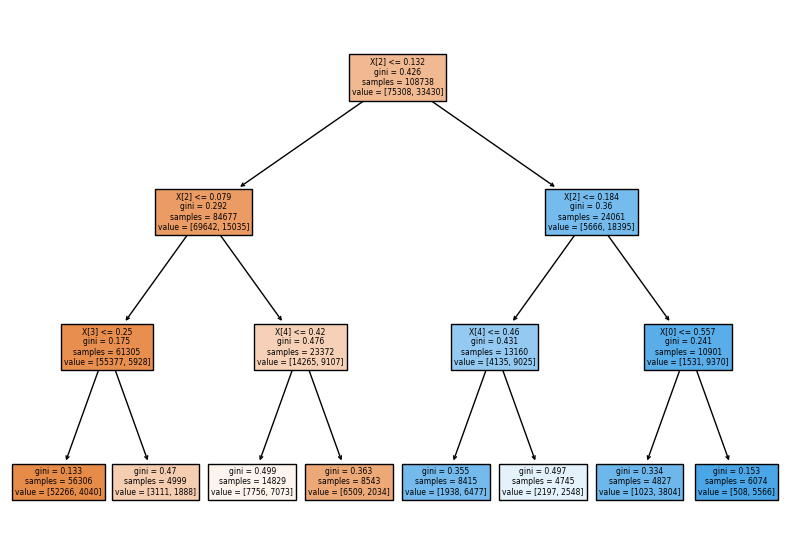

In [70]:
from sklearn import tree
import matplotlib.pyplot as plt


plt.figure(figsize = (10,7))
tree.plot_tree(clf, filled = True)
plt.show()

Usamos matriz de confusión, accuracy y recall como métricas de nuestro modelo.

In [77]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_test_pred)

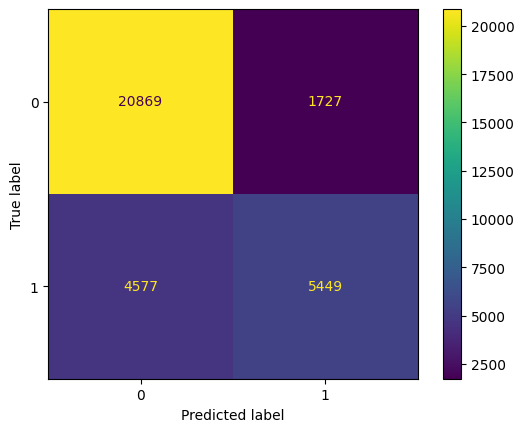

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)

# Otra forma más sencilla de realizar la gráfica es la siguiente

cm_display.plot()

In [79]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

0.8067561768131936


In [80]:
from sklearn.metrics import recall_score

exhaustividad = recall_score(y_test, y_test_pred, average= None)
print(exhaustividad)

[0.92357054 0.54348693]


Creamos la columna de predicción en el segundo dataset e ingestamos los datos resultantes del modelo.

In [86]:
DFT3["pred"]= y_pred 
DFT3.iloc[412:422]

C:\Users\USER\AppData\Local\Temp\ipykernel_20412\844675752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFT3["pred"]= y_pred


,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,title,description,property_type,operation_type,geometry,Pred,pred
Unnamed: 0,,,,,,,,,,,,,,,,,,
794910,P1u3aeuOC9XIN4r5F8JdOg==,Propiedad,2020-12-16,2021-03-10,4.738000,-74.057000,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,Casa En Venta En Bogota Mazuren Cod. VRCR8572,"Vendo casa esquinera 53,31 MTS2. Acogedora ca...",Casa,Venta,POINT (-74.057 4.738),0,0
212693,HoppG00qVWOUm/EwZDFHFg==,Propiedad,2020-11-03,2020-11-18,4.806283,-75.696768,Colombia,Risaralda,Pereira,2.0,COP,Venta apartamento remodelado,Apartamento totalmente remodelado de 55 mts. C...,Apartamento,Venta,POINT (-75.6967684 4.8062829),0,0
558055,PhtEaionq5dSWZPjLHwztw==,Propiedad,2020-08-21,2020-09-01,3.453000,-76.552000,Colombia,Valle del Cauca,Cali,3.0,COP,Casa En Venta En Cali Santa Rita CodVBKWC_1040446,! ESTUPENDA INVERSIÓN ! se trata de una confor...,Casa,Venta,POINT (-76.552 3.453),0,0
430624,XEQ6aSX8c6jXzAEp1LKI7Q==,Propiedad,2020-09-25,2020-11-13,11.027000,-74.861000,Colombia,Atlántico,Barranquilla,5.0,COP,Casa Condominio En Venta En Barranquilla Villa...,"CASA CONJUNTO EN EXCELENTE ESTADO, PISOS EN MA...",Casa,Venta,POINT (-74.861 11.027),1,1
734315,Ww6GR4sx+pzgE5KOnlcNCA==,Propiedad,2020-08-26,2020-11-25,4.792826,-75.714348,Colombia,Risaralda,Pereira,9.0,COP,Casa con 9 rentas habitaciones estudiantes _ w...,Oportunidad de negocio casa con 9 rentas9 habi...,Casa,Venta,POINT (-75.7143479 4.7928256),1,1
514399,KrSLIEL/KW7ZRMKmbhfr/A==,Propiedad,2020-08-05,2020-09-09,7.835000,-72.506000,Colombia,Norte de Santander,Cúcuta,2.0,COP,Apartamento En Venta En Cúcuta K 8 Los Patios ...,CONSTA DE: SALA-COMEDOR-BALCON| COCINA INTEGRA...,Casa,Venta,POINT (-72.506 7.835),0,0
537524,gnE0g0tJjTZIcES3RKwsqw==,Propiedad,2020-11-23,2020-12-04,7.902000,-72.463000,Colombia,Norte de Santander,Cúcuta,1.0,COP,Casa En Venta En Cúcuta Bocono Conjunto Cerrad...,"Casa con excelente zonas verdes, rodeada de Ja...",Casa,Venta,POINT (-72.463 7.902),0,0
896009,HyrNk0PmKX/QyooIq4LYGQ==,Propiedad,2020-11-26,2020-11-27,10.407649,-75.515295,Colombia,Bolívar,Cartagena,2.0,COP,APARTAMENTO EN VENTA AMBERES PISO 4,"Apto ubicado en el 4to callejón Amberes, es vi...",Apartamento,Venta,POINT (-75.5152955 10.407649),0,0
188436,QtPp7ID51UpCZqBgxNqQKw==,Propiedad,2020-08-20,2020-10-15,4.657000,-74.112999,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,SE OFRECE EN INVERSION APTO ARRENDADO EN SALIT...,Desea invertir le ofrecemos apto en arriendo e...,Apartamento,Venta,POINT (-74.11299896 4.65700006),0,0


In [87]:
Final= pd.DataFrame(DFT3["pred"])
Final

,pred
Unnamed: 0,
852569,0
119504,0
859467,0
541599,0
534941,0
...,...
859957,1
3156,1
144249,0


Guardamos la predicción como csv.

In [89]:
ruta = "D:\Melissa\documentos labs\ML\MelissaContreras.csv"

Final.to_csv(ruta,index=False, encoding='utf-8-sig')
